<a href="https://colab.research.google.com/github/ab17254/ce802/blob/main/CE802_P3_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm

sns.set_style('whitegrid')

In [3]:
data = pd.read_csv('CE802_P3_Data.csv')
test = pd.read_csv('CE802_P3_Test.csv')

In [4]:
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,5.82,Low,15.92,-21480.14,2.54,8,-54.21,11.19,-148.74,5.76,-1567.27,61.06,5.86,3861.39,Rest,9,1342.36
1,14.90,Medium,1.06,-30658.72,-2.50,4,-89.22,4.29,-98.80,-7.95,-1440.25,122.98,78.50,3546.00,Rest,9,204.91
2,8.64,Low,1.75,-36063.70,-2.36,8,70.68,-0.33,-141.74,2.34,-1213.40,130.64,4.12,6068.73,UK,6,0.00
3,2.16,Very high,3.95,-39859.52,-6.96,12,104.70,14.07,-88.87,32.10,-773.05,104.01,0.34,4749.24,UK,3,0.00
4,14.36,Low,2.36,-40725.00,3.60,12,-65.61,7.47,-15.16,1.59,-906.33,69.84,0.06,2969.61,Rest,15,0.00


In [5]:
test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,3.06,High,1.32,-50743.74,-1.08,2,10.11,1.74,-67.98,16.17,-1257.99,29.75,6.96,4750.68,Europe,12,NaN
1,9.98,Medium,2.51,-57574.32,-0.75,12,-126.69,9.84,-150.96,0.66,-1257.20,104.60,0.02,3623.19,UK,6,NaN
2,2.30,Very low,3.43,-31777.88,-0.03,8,-21.75,10.62,-124.71,11.94,-345.02,154.47,315.58,4274.67,Europe,9,NaN
3,2.42,Very high,6.67,-42583.36,7.02,8,-185.70,-5.40,-93.20,6.60,-1276.61,40.70,6.40,3892.74,UK,3,NaN
4,2.24,Very high,3.23,-39844.64,-2.44,4,28.41,14.07,-68.80,1.89,-1199.55,85.06,0.20,4624.62,UK,15,NaN


In [6]:
def clean_data(data):
  data.replace({'F2':{'Very low': 0, 'Low':1, 'Medium':2, 'High':3, 'Very high':4}}, inplace=True)
  clean_data = pd.get_dummies(data, columns=['F15'])
  return(clean_data)

In [7]:
data = clean_data(data)
test_data = clean_data(test)

In [8]:
x = data.loc[:, data.columns != 'Target'].to_numpy()
y = data.loc[:, data.columns == 'Target'].to_numpy()
print(x.shape, y.shape)

(1500, 19) (1500, 1)


In [9]:
x_test_data = test_data.loc[:, test_data.columns != 'Target'].to_numpy()
print(x_test_data.shape)

(1500, 19)


In [10]:
k_fold = KFold(n_splits=5)
for train_indices, test_indices in k_fold.split(x):
    ss = StandardScaler()
    ss.fit(x[train_indices, :])
    x_train = ss.transform(x[train_indices, :])
    x_test = ss.transform(x[test_indices, :])
    y_train = y[train_indices]
    y_test = y[test_indices]

In [11]:
ss = StandardScaler()
x_test_fitted = ss.fit_transform(x_test_data)

In [12]:
print(x_test_fitted.shape)

(1500, 19)


## a) Investigate the performance of a number of machine learning procedures on this dataset.

### Linear Regression

In [52]:
model_lin_reg = LinearRegression()
model_lin_reg.fit(x_train, y_train.ravel())
lin_reg_pred = model_lin_reg.predict(x_test)
print('Mean Squared Error: %.2f'% mean_squared_error(y_test, lin_reg_pred))
print('Coefficient of Determination: %.2f'% r2_score(y_test, lin_reg_pred))
model_lin_reg

Mean Squared Error: 271915.55
Coefficient of Determination: 0.79


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

### Tuned Linear regression

In [43]:
lin_reg_param_grid = {'fit_intercept': [True, False],
                      'normalize': [True, False],
                      'n_jobs': [-1,1,5,10,25]}
lin_cv = GridSearchCV(model_lin_reg, lin_reg_param_grid, refit=True)
lin_cv.fit(x_train, y_train.ravel())
lin_cv_pred = lin_cv.predict(x_test)
print('Mean Squared Error: %.2f'% mean_squared_error(y_test, lin_cv_pred))
print('Coefficient of Determination: %.2f'% r2_score(y_test, lin_cv_pred))
print(lin_cv.best_params_)

Mean Squared Error: 273213.37
Coefficient of Determination: 0.79
{'fit_intercept': True, 'n_jobs': -1, 'normalize': False}


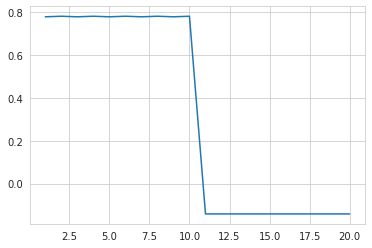

In [45]:
plt.plot(np.arange(1,21), lin_cv.cv_results_['mean_test_score'])

### Support Vector regression

In [53]:
model_svr = svm.SVR()
model_svr.fit(x_train, y_train.ravel())
svr_pred = model_svr.predict(x_test)
print('Mean Squared Error: %.2f'% mean_squared_error(y_test, svr_pred))
print('Coefficient of Determination: %.2f'% r2_score(y_test, svr_pred))


Mean Squared Error: 1520740.30
Coefficient of Determination: -0.20


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### Tuned Support Vector regression

In [16]:
svr_param_grid = {'C':[1,10,100,1000],
              'gamma':[1,0.1,0.001,0.0001],
              'kernel': ['linear', 'rbf']}
svr_cv = GridSearchCV(model_svr, svr_param_grid, refit=True)
svr_cv.fit(x_train, y_train.ravel())
svr_cv_pred = svr_cv.predict(x_test)
print('Mean Squared Error: %.2f'% mean_squared_error(y_test, svr_cv_pred))
print('Coefficient of Determination: %.2f'% r2_score(y_test, svr_cv_pred))
print(svr_cv.best_params_)

Mean Squared Error: 160644.89
Coefficient of Determination: 0.87
{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


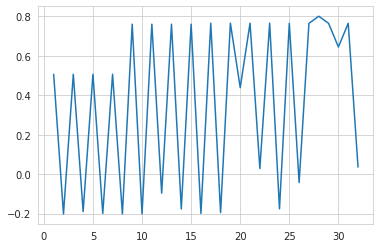

In [26]:
plt.plot(np.arange(1,33), svr_cv.cv_results_['mean_test_score'])

### Gradient Boosting Regression

In [17]:
model_grad = GradientBoostingRegressor()
model_grad.fit(x_train, y_train.ravel())
grad_pred = model_grad.predict(x_test)
print('Mean Squared Error: %.2f'% mean_squared_error(y_test, grad_pred))
print('Coefficient of Determination: %.2f'% r2_score(y_test, grad_pred))

Mean Squared Error: 194286.18
Coefficient of Determination: 0.85


#### Tuned Gradient Boosting regression

In [56]:
grad_param_grid = {'n_estimators':[50,100,200,300,400,500]}
grad_cv = GridSearchCV(model_grad, grad_param_grid, scoring='neg_mean_squared_error', refit=True)
grad_cv.fit(x_train, y_train.ravel())
grad_cv_pred = grad_cv.predict(x_test)
print('Mean Squared Error: %.2f'% mean_squared_error(y_test, grad_cv_pred))
print('Coefficient of Determination: %.2f'% r2_score(y_test, grad_cv_pred))
print(grad_cv.best_params_)

Mean Squared Error: 180909.38
Coefficient of Determination: 0.86
{'n_estimators': 500}


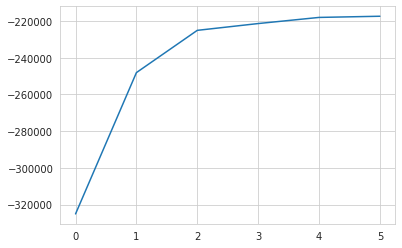

In [57]:
plt.plot(np.arange(6), grad_cv.cv_results_['mean_test_score'])

## b) Prediction on a hold-out test set.

In [19]:
y_test_ouput = svr_cv.predict(x_test_fitted)
test['Target'] = y_test_ouput

In [20]:
test.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,3.06,3,1.32,-50743.74,-1.08,2,10.11,1.74,-67.98,16.17,-1257.99,29.75,6.96,4750.68,Europe,12,-152.911882
1,9.98,2,2.51,-57574.32,-0.75,12,-126.69,9.84,-150.96,0.66,-1257.20,104.60,0.02,3623.19,UK,6,1056.253563
2,2.30,0,3.43,-31777.88,-0.03,8,-21.75,10.62,-124.71,11.94,-345.02,154.47,315.58,4274.67,Europe,9,620.723141
3,2.42,4,6.67,-42583.36,7.02,8,-185.70,-5.40,-93.20,6.60,-1276.61,40.70,6.40,3892.74,UK,3,706.459156
4,2.24,4,3.23,-39844.64,-2.44,4,28.41,14.07,-68.80,1.89,-1199.55,85.06,0.20,4624.62,UK,15,292.565059
5,8.96,1,9.34,-28857.30,6.44,10,22.77,12.33,-97.04,-2.28,-648.67,153.01,12.42,3206.70,USA,12,1658.403535
6,15.96,1,3.64,-37126.68,-1.91,6,-53.19,5.46,-79.29,15.69,-1045.15,59.07,0.04,3666.48,USA,9,726.239612
7,4.02,1,4.97,-42556.44,1.33,12,199.29,3.54,-104.62,-46.83,-1155.72,133.46,0.40,3277.89,USA,3,811.387365
8,14.58,2,0.87,-40054.02,3.23,8,-105.69,10.56,-136.10,10.92,-1179.14,153.10,0.12,2792.97,UK,12,2942.485577
9,28.30,1,4.98,-47597.48,0.71,14,-146.37,-1.53,-118.85,9.72,-1314.27,100.92,1.70,5051.16,Europe,12,1319.916210


In [21]:
test.to_csv('CE802_P3_Test.csv')